In [67]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [68]:
df=pd.read_csv("D:\Om Data Science\Data Science Assignments\Assignment 8\wine.csv")

In [69]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [70]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [71]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [72]:
# Converting into numpy array
array=df.values

In [73]:
array

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [74]:
# Normalizing the numerical data 

df_norm = scale(array)

In [75]:
df_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [76]:
pca = PCA()
#pca = PCA(n_components = 14)

pca_values = pca.fit_transform(df_norm)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [77]:
pca.explained_variance_

array([5.56722458, 2.51118402, 1.45424413, 0.9331603 , 0.88246016,
       0.67657935, 0.55692777, 0.35201176, 0.29620602, 0.26378805,
       0.2271244 , 0.16975037, 0.13029618, 0.05813894])

In [78]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [79]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

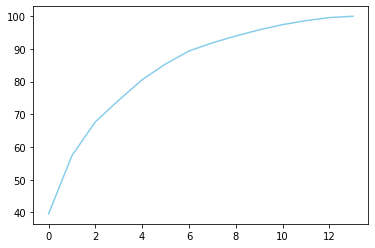

In [80]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="skyblue")

In [81]:
 pca_values[:,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

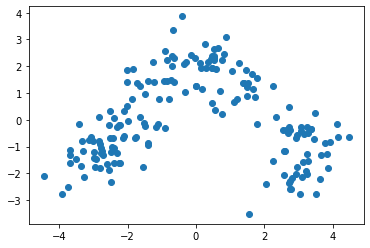

In [82]:
# plot between PCA1 and PCA2 

x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:,2:3]
plt.scatter(x,y)

C:\Users\ompra\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


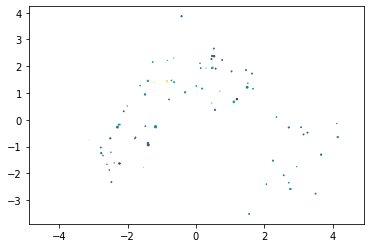

In [83]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
a = pca_values[:,3:4]

plt.scatter(x,y,z,a)

In [84]:
# Final Dataframe
finaldf = pd.concat([df[['Type']], pd.DataFrame(pca_values[:,0:3],
                    columns=['pc1','pc2','pc3']),], axis = 1)

In [85]:
finaldf

,Type,pc1,pc2,pc3
0,1,-3.522934,-1.453098,-0.164795
1,1,-2.528858,0.330019,-2.026707
2,1,-2.785029,-1.036936,0.983238
3,1,-3.922588,-2.768210,-0.174968
4,1,-1.407511,-0.867773,2.025829
...,...,...,...,...
173,3,3.627996,-2.206617,-0.343668
174,3,2.942729,-1.752263,0.207480
175,3,3.027272,-2.756040,-0.940803
176,3,2.755222,-2.293784,-0.550474


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

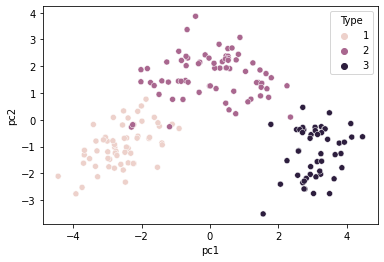

In [86]:
import seaborn as sns

sns.scatterplot(data=finaldf, x='pc1', y='pc2', hue='Type')

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

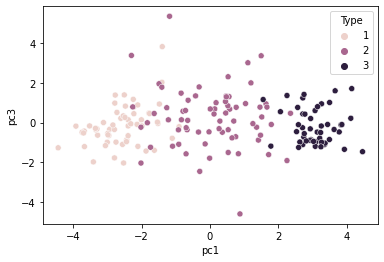

In [87]:
sns.scatterplot(data=finaldf, x='pc1', y='pc3', hue='Type')

In [88]:
from mpl_toolkits import mplot3d  #trying to plot in 3D.

In [89]:
'''# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot')
plt.show()'''

"# plotting\nax.plot3D(x, y, z, 'green')\nax.set_title('3D line plot')\nplt.show()"

In [90]:
'''##Error
sns.scatterplot(data=finaldf, x='pc1', y='pc2', z='pc3', hue='Type')  '''

"##Error\nsns.scatterplot(data=finaldf, x='pc1', y='pc2', z='pc3', hue='Type')  "

# Hierarchical Clustering

In [91]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [92]:
#conda install -c conda-forge imbalanced-learn

In [93]:
finaldf1=finaldf.iloc[:,1:]

In [94]:
finaldf1

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [95]:
finaldf2=finaldf1.copy()
finaldf2

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


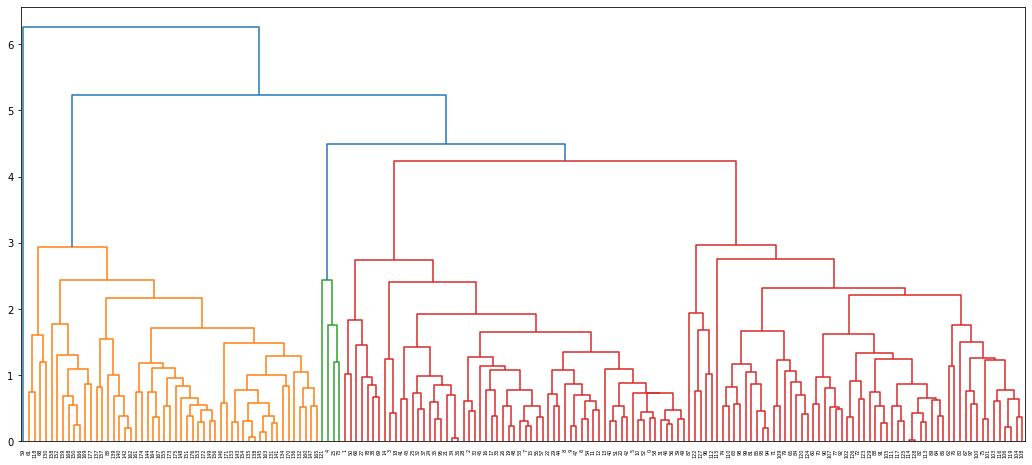

In [96]:
# As we already have normalized data, create Dendrograms
#1
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(finaldf1,'average'))

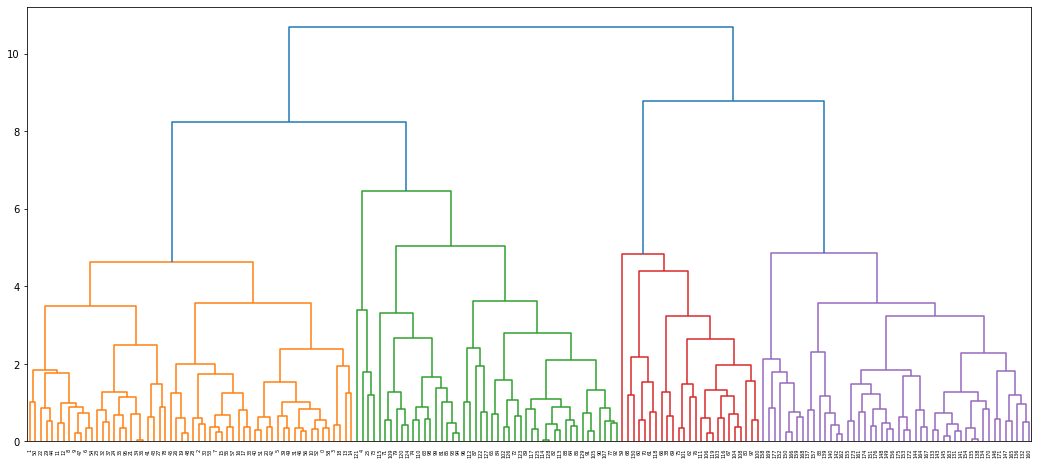

In [97]:
#2
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(finaldf1,'complete'))

In [98]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward') ## also try linkage = 'average'
hc

AgglomerativeClustering(n_clusters=5)

In [99]:
# save clusters for chart
y_hc = hc.fit_predict(finaldf1)

Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [100]:
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,4
...,...
173,1
174,1
175,1
176,1


In [101]:
Clusters['Clusters'].value_counts()

2    56
1    48
0    41
3    29
4     4
Name: Clusters, dtype: int64

In [102]:
# Adding clusters to dataset
finaldf1['h_clusterid'] = Clusters

In [103]:
finaldf1

,pc1,pc2,pc3,h_clusterid
0,-3.522934,-1.453098,-0.164795,2
1,-2.528858,0.330019,-2.026707,2
2,-2.785029,-1.036936,0.983238,2
3,-3.922588,-2.768210,-0.174968,2
4,-1.407511,-0.867773,2.025829,4
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,1
174,2.942729,-1.752263,0.207480,1
175,3.027272,-2.756040,-0.940803,1
176,2.755222,-2.293784,-0.550474,1


# K means

In [104]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [105]:
finaldf2

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [106]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [107]:
#A good model is one with low inertia AND a low number of clusters ( K ).
#However, this is a tradeoff because as K increases, inertia decreases.

In [143]:
kmeansmodel = KMeans(n_clusters=10, random_state=0)
kmeansmodel.fit(finaldf2)

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [144]:
kmeansmodel.inertia_

212.33316569269329

In [145]:
kmeansmodel.labels_

array([2, 3, 8, 2, 8, 2, 2, 8, 2, 2, 2, 3, 2, 2, 2, 8, 8, 8, 2, 8, 2, 8,
       3, 3, 8, 5, 8, 3, 8, 3, 8, 2, 3, 8, 8, 8, 8, 3, 3, 2, 2, 3, 2, 3,
       3, 8, 2, 2, 8, 2, 2, 2, 2, 8, 2, 8, 2, 8, 2, 9, 6, 6, 6, 7, 1, 7,
       3, 7, 6, 3, 6, 1, 6, 5, 7, 6, 6, 6, 3, 1, 7, 7, 1, 4, 7, 7, 1, 1,
       1, 1, 6, 1, 6, 7, 7, 8, 1, 7, 3, 7, 7, 6, 1, 6, 7, 1, 6, 6, 7, 1,
       7, 7, 1, 1, 1, 7, 7, 1, 6, 6, 1, 5, 1, 1, 1, 7, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 0])

In [151]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1, 11):
    kmeansmodel = KMeans(n_clusters=i, random_state=0)
    kmeansmodel.fit(finaldf2)
    wcss.append(kmeansmodel.inertia_)
    if i==1:
        continue  ##min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(finaldf2, kmeansmodel.labels_))
    cal_haz_score.append(calinski_harabasz_score(finaldf2, kmeansmodel.labels_))

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

In [152]:
wcss

[1687.2795345522195,
 925.0339289186138,
 491.23057091626674,
 407.34095937114853,
 355.90298402284634,
 312.8471370039941,
 280.0112922627406,
 250.37519199681475,
 227.94224800271448,
 212.33316569269329]

In [153]:
sil_score

[0.4204121880714807,
 0.4881750664935787,
 0.4373730550531828,
 0.37449595430058175,
 0.38012780261618345,
 0.3313619767260982,
 0.297093964808835,
 0.2956382686833663,
 0.2891824384688966]

In [154]:
cal_haz_score

[145.02735780550805,
 213.04513707878505,
 182.24643422823982,
 161.79138247039555,
 151.12963771522493,
 143.23402667495557,
 139.37582250419857,
 135.2469779011356,
 129.66571721799835]

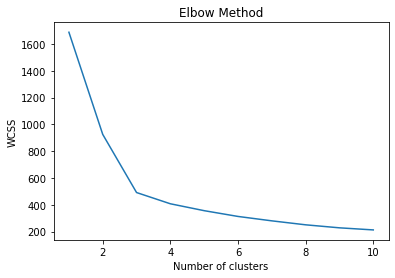

In [155]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [158]:
#Build Cluster algorithm

from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(finaldf2)

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [157]:
clusters_new.labels_

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [159]:
finaldf2['clusterid_new'] = clusters_new.labels_

In [160]:
finaldf2

,pc1,pc2,pc3,clusterid_new
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,3
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0
174,2.942729,-1.752263,0.207480,0
175,3.027272,-2.756040,-0.940803,0
176,2.755222,-2.293784,-0.550474,0


In [161]:
finaldf2.sort_values('clusterid_new')

,pc1,pc2,pc3,clusterid_new
177,3.496336,-2.760608,1.013151,0
148,3.133650,-1.564646,-0.472736,0
147,3.829250,-1.262330,-0.111850,0
146,4.459950,-0.635479,-1.459910,0
145,2.954011,-0.557851,-0.856141,0
...,...,...,...,...
71,-1.491978,0.947927,1.953837,3
25,-1.397538,-0.938215,3.819842,3
73,-2.299457,-0.274359,3.376817,3
122,1.106942,0.669497,3.009463,3
